In [198]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer,LabelEncoder,StandardScaler,OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,mean_squared_log_error,roc_curve,precision_recall_curve
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor,GradientBoostingRegressor

In [199]:
train1=pd.read_excel(r'C:\Users\Rahul\Desktop\ML\Final_Train.xlsx')
test1=pd.read_excel(r'C:\Users\Rahul\Desktop\ML\Final_Test.xlsx')

In [200]:
train1.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [201]:
train1.Profile.value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [202]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
Qualification         5961 non-null object
Experience            5961 non-null object
Rating                2659 non-null object
Place                 5936 non-null object
Profile               5961 non-null object
Miscellaneous_Info    3341 non-null object
Fees                  5961 non-null int64
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [203]:
test1.head(2)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN


In [204]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
Qualification         5961 non-null object
Experience            5961 non-null object
Rating                2659 non-null object
Place                 5936 non-null object
Profile               5961 non-null object
Miscellaneous_Info    3341 non-null object
Fees                  5961 non-null int64
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [205]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
Qualification         1987 non-null object
Experience            1987 non-null object
Rating                897 non-null object
Place                 1981 non-null object
Profile               1987 non-null object
Miscellaneous_Info    1153 non-null object
dtypes: object(6)
memory usage: 93.2+ KB


In [206]:
train1.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


In [207]:
test1.describe()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
count,1987,1987,897,1981,1987,1153
unique,630,57,36,592,6,1084
top,BAMS,10 years experience,100%,"Mulund West, Mumbai",General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...
freq,153,110,223,27,444,10


In [208]:
train1.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [209]:
test1.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [210]:
train1['Rating'].replace('(%)','',regex=True,inplace=True)
test1['Rating'].replace('(%)','',regex=True,inplace=True)

In [211]:
train1.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [212]:
train1.Rating.dtype

dtype('O')

In [213]:
train1.Rating=train1.Rating.astype('float32')
test1.Rating=test1.Rating.astype('float32')

In [214]:
train1['Place']=train1['Place'].str.extract(r'.* (.*)')
test1['Place']=test1['Place'].str.extract(r'.* (.*)')

In [215]:
train1['Qualification_No.'] = train1.Qualification.apply(lambda x: len((str(x).split(','))))
test1['Qualification_No.'] = test1.Qualification.apply(lambda x: len((str(x).split(','))))

In [216]:
train1['Experience']=train1['Experience'].str.extract(r'(^\d{1,2}) .*')
test1['Experience']=test1['Experience'].str.extract(r'(^\d{1,2}) .*')

In [217]:
train1.Experience=train1.Experience.astype('int64')
test1.Experience=test1.Experience.astype('int64')

In [218]:
train1.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qualification_No.
0,"BHMS, MD - Homeopathy",24,100.0,Ernakulam,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,2
1,"BAMS, MD - Ayurveda Medicine",12,98.0,Bangalore,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,2
2,"MBBS, MS - Otorhinolaryngology",9,NaN,Bangalore,ENT Specialist,NaN,300,2
3,"BSc - Zoology, BAMS",12,NaN,Bangalore,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,2
4,BAMS,20,100.0,Chennai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,1


In [219]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 8 columns):
Qualification         5961 non-null object
Experience            5961 non-null int64
Rating                2659 non-null float32
Place                 5935 non-null object
Profile               5961 non-null object
Miscellaneous_Info    3341 non-null object
Fees                  5961 non-null int64
Qualification_No.     5961 non-null int64
dtypes: float32(1), int64(3), object(4)
memory usage: 349.4+ KB


In [220]:
train1.groupby(['Place','Experience'])['Rating'].value_counts()

Place               Experience  Rating
Bangalore           0           79.0       1
                                95.0       1
                                97.0       1
                                100.0      1
                    2           100.0      5
                    3           100.0      5
                                95.0       1
                                98.0       1
                    4           100.0      3
                                95.0       2
                                96.0       1
                                98.0       1
                    5           100.0     15
                                94.0       2
                                97.0       2
                                85.0       1
                                88.0       1
                                93.0       1
                                98.0       1
                                99.0       1
                    6           100.0     13
                

In [221]:
train1['Place'].fillna('Ernakulam',inplace=True)

In [222]:
train1.Place.isnull().sum()

0

In [223]:
train1.Rating=train1.groupby(['Profile']).transform(lambda x: x.fillna(x.median()))
test1.Rating=test1.groupby(['Profile']).transform(lambda x: x.fillna(x.median()))

In [224]:
train1['Exp. per Qual.']=pd.Series(np.sqrt((((train1['Experience'])**2)/((train1['Qualification_No.'])**2))))
test1['Exp. per Qual.']=pd.Series(np.sqrt((((test1['Experience'])**2)/((test1['Qualification_No.'])**2))))

In [225]:
train1.Profile.isnull().sum()

0

In [226]:
train1.Miscellaneous_Info.fillna(train1['Rating'].mean(),inplace=True)

In [227]:
train1['Misc_info']=train1['Miscellaneous_Info'].apply(lambda x:len(str(x).split(',')))

In [228]:
train1.Profile.value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [229]:
train1[train1.Rating.isnull()]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qualification_No.,Exp. per Qual.,Misc_info


In [230]:
#den=train1[train1.Profile=='Dentist'].Qualification.str.extract(r'(BDS, MDS) ?')
#dent=test1[test1.Profile=='Dentist'].Qualification.str.extract(r'(BDS, MDS) ?')

In [231]:
#den.fillna('BDS(Dental)',inplace=True)
#dent.fillna('BDS(Dental)',inplace=True)

In [232]:
#den.count() ############ Dentist degree done

In [233]:
#den.rename(columns={0:'Dentist Degree'},inplace=True)
#dent.rename(columns={0:'Dentist Degree'},inplace=True)

In [234]:
#hom=train1[train1.Profile=='Homeopath'].Qualification.str.extract(r'(BHMS, MD)?')
#homt=test1[test1.Profile=='Homeopath'].Qualification.str.extract(r'(BHMS, MD)?')

In [235]:
#hom.fillna('BHMS(Homeopath)',inplace=True)
#homt.fillna('BHMS(Homeopath)',inplace=True)

In [236]:
#hom.rename(columns={0:'Homeopath'},inplace=True)
#homt.rename(columns={0:'Homeopath'},inplace=True)

In [237]:
#hom.count() ########### Homeopath done

In [238]:
#ayu=train1[train1.Profile=='Ayurveda'].Qualification.str.extract(r'(BAMS, MD) ?')
#ayut=test1[test1.Profile=='Ayurveda'].Qualification.str.extract(r'(BAMS, MD) ?')

In [239]:
#ayu.fillna('BAMS(Ayurveda)',inplace=True)
#ayut.fillna('BAMS(Ayurveda)',inplace=True)

In [240]:
#ayu.rename(columns={0:'Ayurveda'},inplace=True)
#ayut.rename(columns={0:'Ayurveda'},inplace=True)

In [241]:
#train1[train1.Profile=='Ayurveda'].Qualification.count()
#test1[test1.Profile=='Ayurveda'].Qualification.count()

In [242]:
#ent=train1[train1.Profile=='ENT Specialist'].Qualification.str.extract(r'(MBBS, MS) ?')
#entt=test1[test1.Profile=='ENT Specialist'].Qualification.str.extract(r'(MBBS, MS) ?')

In [243]:
#ent.fillna('MBBS(ENT)',inplace=True)
#entt.fillna('MBBS(ENT)',inplace=True)

In [244]:
#ent.rename(columns={0:'ENT Specialist'},inplace=True)
#entt.rename(columns={0:'ENT Specialist'},inplace=True)

In [245]:
#ent.count()

In [246]:
#train1[train1.Profile=='ENT Specialist'].Qualification.count()


In [247]:
#gm=train1[train1.Profile=='General Medicine'].Qualification.str.extract(r'(MBBS, MD) ?')
#gmt=test1[test1.Profile=='General Medicine'].Qualification.str.extract(r'(MBBS, MD) ?')

In [248]:
#gm.fillna('MBBS(GM)',inplace=True)
#gmt.fillna('MBBS(GM)',inplace=True)

In [249]:
#gm.rename(columns={0:'General Medicine'},inplace=True)
#gmt.rename(columns={0:'General Medicine'},inplace=True)

In [250]:
#gm.count()

In [251]:
#der=train1[train1.Profile=='Dermatologists'].Qualification.str.extract(r'(MBBS, MD) ?')
#dert=test1[test1.Profile=='Dermatologists'].Qualification.str.extract(r'(MBBS, MD) ?')

In [252]:
#der.fillna('MBBS(Der.)',inplace=True)
#dert.fillna('MBBS(Der.)',inplace=True)

In [253]:
#der.rename(columns={0:'Dermatologist'},inplace=True)
#dert.rename(columns={0:'Dermatologist'},inplace=True)

In [254]:
#new=pd.concat([den,hom,ayu,ent,gm,der],axis=1)
#newt=pd.concat([dent,homt,ayut,entt,gmt,dert],axis=1)

In [255]:
#new.fillna('Not Acquired',inplace=True)
#newt.fillna('Not Acquired',inplace=True)

In [256]:
#train1=pd.concat([train1,new],axis=1)
#test1=pd.concat([test1,newt],axis=1)

In [257]:
train1['Qualification_No.'].value_counts()

2     2628
1     1962
3      995
4      257
5       84
6       23
7        6
9        3
8        2
10       1
Name: Qualification_No., dtype: int64

In [258]:
train1.loc[2035,'Qualification_No.']=2

In [259]:
train1.loc[3562,'Qualification_No.']=3

In [260]:
test1[test1['Qualification_No.']==17]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Qualification_No.,Exp. per Qual.
1287,"BDS, PG Diploma in Conservative, Endodontics a...",4,4.0,Delhi,Dentist,Dental Crowns Dental Fillings Dental Implant F...,17,0.235294


In [261]:
test1.loc[1287,'Qualification_No.']=2

In [262]:
train1.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qualification_No.,Exp. per Qual.,Misc_info
0,"BHMS, MD - Homeopathy",24,24.0,Ernakulam,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,2,12.0,2
1,"BAMS, MD - Ayurveda Medicine",12,12.0,Bangalore,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,2,6.0,2
2,"MBBS, MS - Otorhinolaryngology",9,9.0,Bangalore,ENT Specialist,17.304,300,2,4.5,1
3,"BSc - Zoology, BAMS",12,12.0,Bangalore,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,2,6.0,3
4,BAMS,20,20.0,Chennai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,1,20.0,2


In [263]:
test1.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Qualification_No.,Exp. per Qual.
0,MBBS,35,35.0,Mumbai,General Medicine,NaN,1,35.0
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,31.0,Hyderabad,ENT Specialist,NaN,2,15.5
2,"MBBS, DDVL",40,40.0,Chennai,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",2,20.0
3,BAMS,0,0.0,Delhi,Ayurveda,NaN,1,0.0
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,16.0,Bangalore,Dentist,General Dentistry Conservative Dentistry Cosme...,2,8.0


In [264]:
test1['Place'].fillna('Bangalore',inplace=True)

In [265]:
test1['Misc_info']=test1['Miscellaneous_Info'].apply(lambda x:len(str(x).split(',')))

In [266]:
train1[train1.Miscellaneous_Info.isnull()].head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qualification_No.,Exp. per Qual.,Misc_info


In [267]:
#train1['Rate_log_error']=(train1['Rating']+1).transform(np.log)
#test1['Rate_log_error']=(test1['Rating']+1).transform(np.log)

In [268]:
train1.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
Qualification_No.     0
Exp. per Qual.        0
Misc_info             0
dtype: int64

In [269]:
train1.drop(columns=['Qualification','Miscellaneous_Info'],inplace=True)

In [270]:
test1.drop(columns=['Qualification','Miscellaneous_Info'],inplace=True)

In [271]:
train1.head()

,Experience,Rating,Place,Profile,Fees,Qualification_No.,Exp. per Qual.,Misc_info
0,24,24.0,Ernakulam,Homeopath,100,2,12.0,2
1,12,12.0,Bangalore,Ayurveda,350,2,6.0,2
2,9,9.0,Bangalore,ENT Specialist,300,2,4.5,1
3,12,12.0,Bangalore,Ayurveda,250,2,6.0,3
4,20,20.0,Chennai,Ayurveda,250,1,20.0,2


In [272]:
train1.loc[2262,'Experience']=25

In [273]:
train1.loc[110,'Experience']=18

In [274]:
train1.loc[2062,'Experience']=14

In [275]:
train1.loc[5087,'Experience']=20

In [276]:
train1.loc[5637,'Experience']=18

In [277]:
train1.loc[372,'Experience']=23

In [278]:
test1.Experience=test1.Experience.astype('int64')

In [279]:
#a=[-1,0,10,20,30,40,50,60,70]
#l=['Not-Experienced','G-Grade','F-Grade','E-Grade','D-Grade','C-Grade','B-Grade','A-Grade']
#train1['Grade']=pd.cut(train1.Experience,a,labels=l)
#test1['Grade']=pd.cut(test1.Experience,a,labels=l)

In [280]:
train1.head()

,Experience,Rating,Place,Profile,Fees,Qualification_No.,Exp. per Qual.,Misc_info
0,24,24.0,Ernakulam,Homeopath,100,2,12.0,2
1,12,12.0,Bangalore,Ayurveda,350,2,6.0,2
2,9,9.0,Bangalore,ENT Specialist,300,2,4.5,1
3,12,12.0,Bangalore,Ayurveda,250,2,6.0,3
4,20,20.0,Chennai,Ayurveda,250,1,20.0,2


In [281]:
test1.head()

,Experience,Rating,Place,Profile,Qualification_No.,Exp. per Qual.,Misc_info
0,35,35.0,Mumbai,General Medicine,1,35.0,1
1,31,31.0,Hyderabad,ENT Specialist,2,15.5,1
2,40,40.0,Chennai,Dermatologists,2,20.0,2
3,0,0.0,Delhi,Ayurveda,1,0.0,1
4,16,16.0,Bangalore,Dentist,2,8.0,1


In [282]:
train1['Rating. per Qual.']=((train1['Rating']*0.01)/train1['Qualification_No.'])
test1['Rating. per Qual.']=((test1['Rating']*0.01)/test1['Qualification_No.'])

In [283]:
train1.head()

,Experience,Rating,Place,Profile,Fees,Qualification_No.,Exp. per Qual.,Misc_info,Rating. per Qual.
0,24,24.0,Ernakulam,Homeopath,100,2,12.0,2,0.120
1,12,12.0,Bangalore,Ayurveda,350,2,6.0,2,0.060
2,9,9.0,Bangalore,ENT Specialist,300,2,4.5,1,0.045
3,12,12.0,Bangalore,Ayurveda,250,2,6.0,3,0.060
4,20,20.0,Chennai,Ayurveda,250,1,20.0,2,0.200


In [284]:
train1['Profile'].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [285]:
le=LabelEncoder()
train1['Place']=le.fit_transform(train1['Place'])
train1['Profile']=le.fit_transform(train1['Profile'])
#test1['Grade']=le.fit_transform(test1['Grade'])
#train1['Grade']=le.fit_transform(train1['Grade'])
test1['Place']=le.fit_transform(test1['Place'])
test1['Profile']=le.fit_transform(test1['Profile'])

In [286]:
#train1['Dentist Degree']=le.fit_transform(train1['Dentist Degree'])
#train1['Homeopath']=le.fit_transform(train1['Homeopath'])
#train1['Ayurveda']=le.fit_transform(train1['Ayurveda'])
#train1['ENT Specialist']=le.fit_transform(train1['ENT Specialist'])
#train1['General Medicine']=le.fit_transform(train1['General Medicine'])
#train1['Dermatologist']=le.fit_transform(train1['Dermatologist'])

In [287]:
#test1['Dentist Degree']=le.fit_transform(test1['Dentist Degree'])
#test1['Homeopath']=le.fit_transform(test1['Homeopath'])
#test1['Ayurveda']=le.fit_transform(test1['Ayurveda'])
#test1['ENT Specialist']=le.fit_transform(test1['ENT Specialist'])
#test1['General Medicine']=le.fit_transform(test1['General Medicine'])
#test1['Dermatologist']=le.fit_transform(test1['Dermatologist'])



In [288]:
label=train1['Fees']
train1.drop(columns=['Fees'],inplace=True)

In [289]:
stsc=StandardScaler()
train1['Experience']=stsc.fit_transform(train1['Experience'].values.reshape(-1,1))
test1['Experience']=stsc.fit_transform(test1['Experience'].values.reshape(-1,1))
train1['Rating']=stsc.fit_transform(train1['Rating'].values.reshape(-1,1))
test1['Rating']=stsc.fit_transform(test1['Rating'].values.reshape(-1,1))
#test1['Grade']=stsc.fit_transform(test1['Grade'].values.reshape(-1,1))
#train1['Grade']=stsc.fit_transform(train1['Grade'].values.reshape(-1,1))
train1['Qualification_No.']=stsc.fit_transform(train1['Qualification_No.'].values.reshape(-1,1))
test1['Qualification_No.']=stsc.fit_transform(test1['Qualification_No.'].values.reshape(-1,1))
train1['Exp. per Qual.']=stsc.fit_transform(train1['Exp. per Qual.'].values.reshape(-1,1))
test1['Exp. per Qual.']=stsc.fit_transform(test1['Exp. per Qual.'].values.reshape(-1,1))
train1['Rating. per Qual.']=stsc.fit_transform(train1['Rating. per Qual.'].values.reshape(-1,1))
train1['Misc_info']=stsc.fit_transform(train1['Misc_info'].values.reshape(-1,1))
#test1['Rating. per Qual.']=stsc.fit_transform(test1['Rating. per Qual.'].values.reshape(-1,1))
#train1['Rate_log_error']=stsc.fit_transform(train1['Rate_log_error'].values.reshape(-1,1))
#test1['Rate_log_error']=stsc.fit_transform(test1['Rate_log_error'].values.reshape(-1,1))

E:\New folder\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
E:\New folder\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
E:\New folder\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
E:\New folder\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
E:\New folder\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, Dat

In [290]:
train1['Experience'].std()

1.000083889098767

In [291]:
train1.Rating.std()

1.0000838890987578

In [292]:
train1.head()

,Experience,Rating,Place,Profile,Qualification_No.,Exp. per Qual.,Misc_info,Rating. per Qual.
0,0.608375,0.600979,4,5,0.008954,0.155792,1.436034,0.155624
1,-0.476030,-0.476040,0,0,0.008954,-0.503596,1.436034,-0.503823
2,-0.747132,-0.745295,0,3,0.008954,-0.668443,-0.621212,-0.668685
3,-0.476030,-0.476040,0,0,0.008954,-0.503596,3.493280,-0.503823
4,0.246906,0.241972,1,0,-1.037591,1.034975,1.436034,1.034887


In [293]:
train1.isnull().sum()

Experience           0
Rating               0
Place                0
Profile              0
Qualification_No.    0
Exp. per Qual.       0
Misc_info            0
Rating. per Qual.    0
dtype: int64

In [294]:
test1.isnull().sum()

Experience           0
Rating               0
Place                0
Profile              0
Qualification_No.    0
Exp. per Qual.       0
Misc_info            0
Rating. per Qual.    0
dtype: int64

In [295]:
#train1['min'] = np.min(train1, axis =1)
#train1['max'] = np.max(train1, axis =1)
#train1['mean'] = np.mean(train1, axis =1)
#train1['median'] = np.median(train1, axis =1)
#train1['skew'] = train1.skew(axis = 1)
#train1['kurt'] = train1.kurt(axis = 1)

# ML

In [296]:
def metric(y_act, y_pred):
    return(1-(np.sqrt(np.mean((np.log10(y_act) - np.log10(y_pred))**2))))

from sklearn.metrics import make_scorer
my_metric = make_scorer(metric, greater_is_better=False)

In [297]:
xtrain,xtest,ytrain,ytest=train_test_split(train1,label,test_size=0.2,random_state=100)

In [298]:
lin_reg=LinearRegression()
dst_reg=DecisionTreeRegressor()
rnd_reg=RandomForestRegressor()
ada_reg=AdaBoostRegressor()
ext_reg=ExtraTreesRegressor()
svm=SVR()
gdb_reg=GradientBoostingRegressor()
rid_reg=Ridge(alpha=1.5)
las_reg=Lasso(alpha=1.5)

In [299]:
lin_reg.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [300]:
lin_pred=lin_reg.predict(xtest)

In [301]:
cv_lin=cross_val_score(lin_reg,xtrain,ytrain,scoring= my_metric,cv=5)

In [302]:
-cv_lin

array([0.69716875, 0.70151036, 0.70197323, 0.71360351, 0.70851836])

In [303]:
cv_lin.mean()

-0.7045548423575501

In [304]:
-cross_val_score(rid_reg,xtrain,ytrain,scoring=my_metric,cv=5).mean()

0.7045554937079712

In [305]:
-cross_val_score(las_reg,xtrain,ytrain,scoring=my_metric,cv=5).mean()

0.703973985822055

In [306]:
(-cross_val_score(dst_reg,xtrain,ytrain,scoring=my_metric,cv=5)).mean()

0.6533536351270628

In [307]:
(-cross_val_score(rnd_reg,xtrain,ytrain,scoring=my_metric,cv=5)).mean()

E:\New folder\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\New folder\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\New folder\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\New folder\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\New folder\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will ch

0.6982024051276086

In [308]:
(-cross_val_score(ada_reg,xtrain,ytrain,scoring=my_metric,cv=5)).mean()

0.6977485064605133

In [309]:
(-cross_val_score(ext_reg,xtrain,ytrain,scoring=my_metric,cv=5)).mean()

E:\New folder\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\New folder\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\New folder\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\New folder\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\New folder\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will ch

0.6774003845775378

In [310]:
(-cross_val_score(svm,xtrain,ytrain,scoring=my_metric,cv=5)).mean()

E:\New folder\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\New folder\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\New folder\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\New folder\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change f

0.7159758661090467

In [311]:
gdb_reg.fit(xtrain,ytrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [312]:
cross_val_score(gdb_reg,xtrain,ytrain,scoring=my_metric,cv=5).mean()

-0.7234457451248648

In [313]:
train1.columns

Index(['Experience', 'Rating', 'Place', 'Profile', 'Qualification_No.',
       'Exp. per Qual.', 'Misc_info', 'Rating. per Qual.'],
      dtype='object')

In [314]:
gdb_reg.fit(xtrain,ytrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

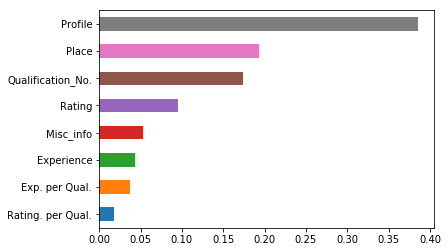

In [315]:
pd.Series(gdb_reg.feature_importances_, index = train1.columns).sort_values(ascending=True).plot.barh()

In [322]:
test=gdb_reg.predict(test1)

In [323]:
test=list(test)

In [324]:
test=pd.DataFrame(test)

In [325]:
test.rename(columns={0:'Fees'},inplace=True)

In [326]:
test.to_excel('Submit_gdb.xlsx')

In [321]:
#test